In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/potholes/Potholes.csv
/kaggle/input/potholes-map/map.png


In [2]:
# Import Necessary Libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt 

In [3]:
#loead the data
dataset = pd.read_csv('/kaggle/input/potholes/Potholes.csv')
dataset

,Pkey,Longitude,Latitude
0,1475501,-113.628,53.6546
1,1475502,-113.628,53.6546
2,1658095,-113.616,53.4291
3,1828442,-113.616,53.4292
4,1828443,-113.591,53.4285
5,1828445,-113.618,53.4383
6,1845294,-113.617,53.4287
7,1855234,-113.375,53.4544
8,1855235,-113.375,53.4546
9,1855239,-113.616,53.4287


In [4]:
#train the model 
#Note that radians conversion is used for the epsilon distance
model=DBSCAN(eps=2000/6371, min_samples=3, algorithm='ball_tree').fit(np.radians(dataset))
print(model.labels_)

[-1 -1 -1  0  0  0 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2  2  2
 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  4  4  4  5  5  5 -1 -1 -1 -1 -1 -1]


In [5]:
# assign cluster labels
#Note that -1 cluster labels are considered to be an outlier
dataset['cluster_label'] = model.labels_
dataset.head()


,Pkey,Longitude,Latitude,cluster_label
0,1475501,-113.628,53.6546,-1
1,1475502,-113.628,53.6546,-1
2,1658095,-113.616,53.4291,-1
3,1828442,-113.616,53.4292,0
4,1828443,-113.591,53.4285,0


In [6]:
#Assigning colors
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

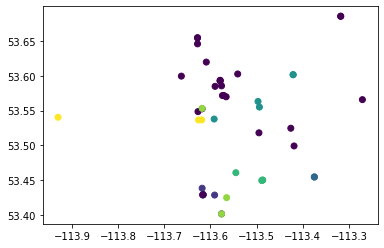

In [7]:
#Plotting
plt.scatter(dataset['Longitude'], dataset['Latitude'] , c=dataset['cluster_label']);

In [8]:
#plotting the clusters on the map using openstreetmap website png image
#https://www.openstreetmap.org/export#map=11/53.5438/-113.6858
#click on share an save PNG of the boundary specified in the boundary box below


In [9]:
#plot the coordiantes
#defining the bounding box for the map
BBox = ((dataset.Longitude.max(),   
         dataset.Longitude.min(),
         dataset.Latitude.max(),
         dataset.Latitude.min()))
         
BBox

(-113.271, -113.93, 53.6856, 53.4014)

In [10]:
map = plt.imread('/kaggle/input/potholes-map/map.png')

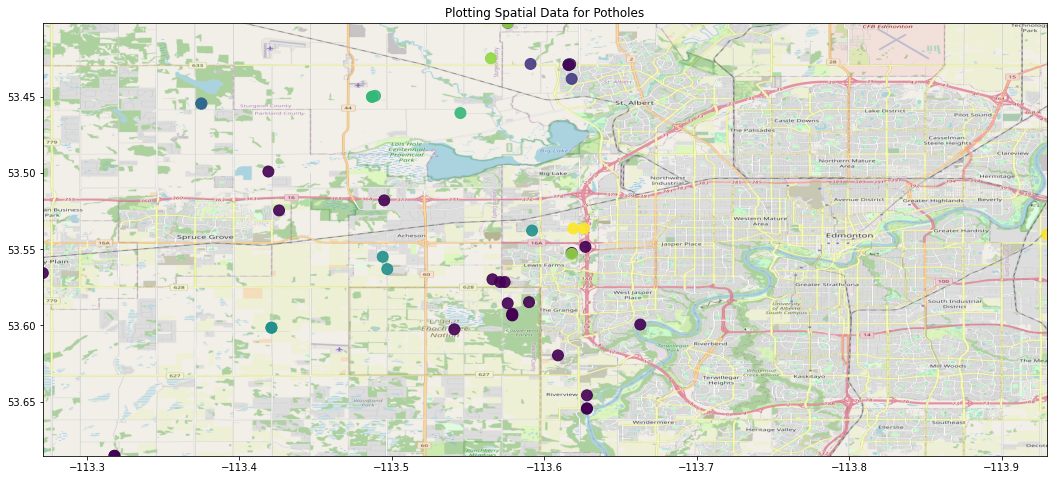

In [11]:
fig, ax = plt.subplots(figsize = (18,17))
ax.scatter(dataset.Longitude, dataset.Latitude, zorder=1, alpha= 0.9, c=dataset.cluster_label, s=120, label=dataset.cluster_label)
ax.set_title('Plotting Spatial Data for Potholes')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')